# Perkenalan

Nama : Febrian Hendifa

Batch : FTDS-016-RMT

Dataset : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv

Objective : Melakukan prediksi terhadap harga jual sebuah mobil

## Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC

import joblib
import json

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Data Loading

In [8]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [9]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [10]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [11]:
data.shape

(4340, 8)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Dataset ini meliki 4340 baris dan 8 kolom

In [13]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Dataset ini tidak memiliki missing value

In [14]:
# Menampilkan describe data

data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Exploratory Data Analysis (EDA)

## Info Data

name          : Name of the cars

year          : Year of the car when it was bought 

selling_price : Price at which the car is being sold   

km_driven     : Number of Kilometres the car is driven  

fuel          : Fuel type of car (petrol / diesel / CNG / LPG / electric) 

seller_type   : Tells if a Seller is Individual or a Dealer  

transmission  : Gear transmission of the car (Automatic/Manual)  

owner         : Number of previous owners of the car.  

## Owner

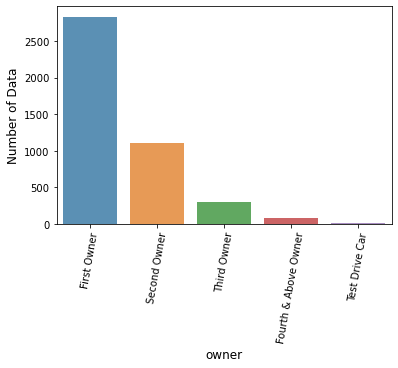

In [15]:
cnt_pro = data['owner'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('owner', fontsize=12)
plt.xticks(rotation=80)
plt.show();

Terlihat jika data pada kolom owner lebih banyak First Owner atau pemilik mobil pertama

## Name

In [16]:
px.pie(data_frame = data ,names = data.name.value_counts().head(10).index,values = data.name.value_counts().values[0:10],
      title = "Top 10 vehicle for sale",hole = 0.7
      )

Terlihat jika mobil Maruti Swift Dzine VDI paling banyak dijual pada dataset ini

## Seller Type

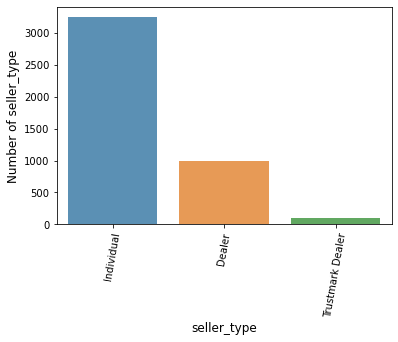

In [17]:
cnt_pro = data['seller_type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of seller_type', fontsize=12)
plt.xlabel('seller_type', fontsize=12)
plt.xticks(rotation=80)
plt.show();

Terlihat jika penjualan secara Individual lebih banyak ketimbang secara Dealer

## Selling Price Based on Seller Type

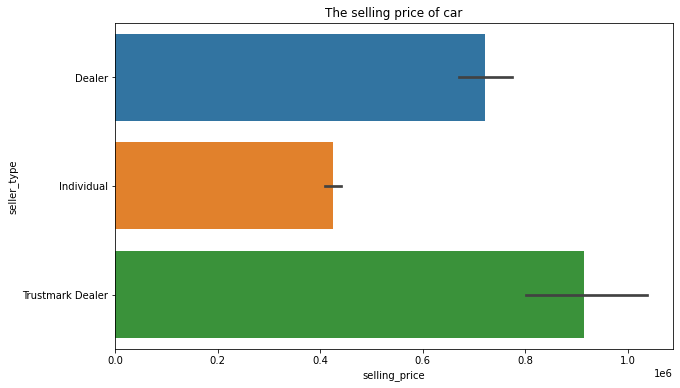

In [18]:
top_sell = data.sort_values(by='selling_price', ascending=False)
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_sell.seller_type, x=top_sell.selling_price)
plt.xticks()
plt.xlabel('selling_price')
plt.ylabel('seller_type')
plt.title('The selling price of car')
plt.show()

Untuk harga jual tertinggi berdasarkan seller_type lebih tingging di Trustmark Dealer ketimbang Individual

## Fuel Type

In [19]:
px.pie(data_frame = data ,names = data.fuel.value_counts().index,values = data.fuel.value_counts().values,
      title = "vehicle fuel type " ,hole = 0.7
      )

## Visualisasi Data Numerik

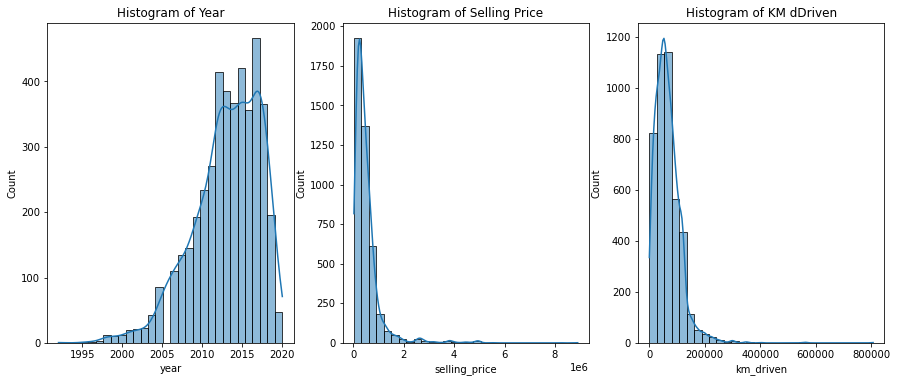

In [20]:
# Visualisasi data untuk kolom numerik

plt.figure(figsize=(15,20))

plt.subplot(3,3,1)
sns.histplot(data['year'], bins=30, kde=True)
plt.title('Histogram of Year')

plt.subplot(3,3,2)
sns.histplot(data['selling_price'], bins=30, kde=True)
plt.title('Histogram of Selling Price')

plt.subplot(3,3,3)
sns.histplot(data['km_driven'], bins=30, kde=True)
plt.title('Histogram of KM dDriven')

plt.show()

Berdasarkan data grafik histogram diatas terlihat jika seluruh kolomnya mengalami skewed 

<AxesSubplot:>

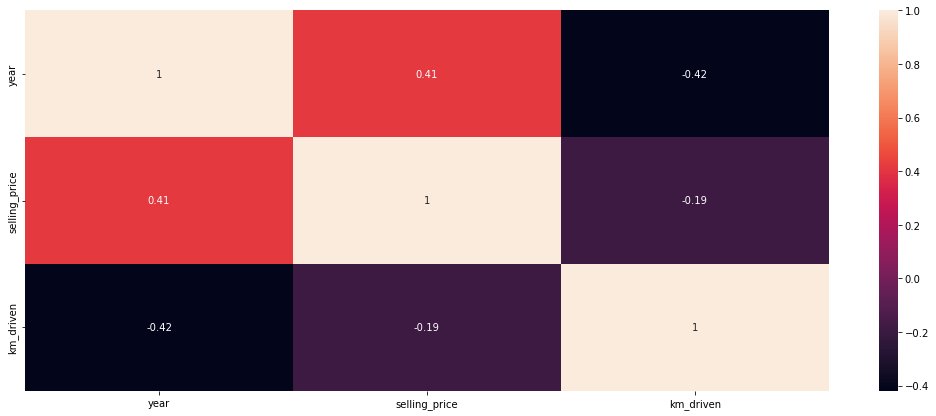

In [21]:
# Pembuatan heatmap untuk melihat korelasi

plt.figure(figsize = (18, 7))
sns.heatmap(data.corr(), annot = True)

Kolom selling price memiliki korelasi yang tinggi terhadap kolom year

# Data Preprocessing

## Model Inference

In [22]:
# Get Data for Model Inference

data_inf = data.sample(20, random_state = 41)
data_inf

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
624,Hyundai Santro GS,2005,80000,56580,Petrol,Dealer,Manual,First Owner
1331,Maruti Ertiga VDI,2019,925000,50000,Diesel,Individual,Manual,First Owner
91,Renault Duster 85PS Diesel RxL Optional,2013,600000,120000,Diesel,Individual,Manual,First Owner
1419,Chevrolet Beat LT,2012,155000,12000,Petrol,Individual,Manual,First Owner
1643,Tata Sumo Victa EX 7/9 Str BSII,2009,130000,120000,Diesel,Individual,Manual,First Owner
2477,Hyundai Creta 1.6 CRDi SX,2016,535000,52600,Diesel,Individual,Manual,First Owner
1339,Maruti Alto 800 LXI,2018,275000,35000,Petrol,Individual,Manual,First Owner
2448,Toyota Etios Liva 1.4 VD,2017,425000,36000,Diesel,Dealer,Manual,First Owner
1083,Ford EcoSport 1.5 TDCi Titanium BSIV,2018,950000,21394,Diesel,Dealer,Manual,First Owner
137,Maruti 800 Std,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner


In [23]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [24]:
# Reset Index

data_train_test.reset_index(drop = True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Hyundai Santro GS,2005,80000,56580,Petrol,Dealer,Manual,First Owner
1,Maruti Ertiga VDI,2019,925000,50000,Diesel,Individual,Manual,First Owner
2,Renault Duster 85PS Diesel RxL Optional,2013,600000,120000,Diesel,Individual,Manual,First Owner
3,Chevrolet Beat LT,2012,155000,12000,Petrol,Individual,Manual,First Owner
4,Tata Sumo Victa EX 7/9 Str BSII,2009,130000,120000,Diesel,Individual,Manual,First Owner
5,Hyundai Creta 1.6 CRDi SX,2016,535000,52600,Diesel,Individual,Manual,First Owner
6,Maruti Alto 800 LXI,2018,275000,35000,Petrol,Individual,Manual,First Owner
7,Toyota Etios Liva 1.4 VD,2017,425000,36000,Diesel,Dealer,Manual,First Owner
8,Ford EcoSport 1.5 TDCi Titanium BSIV,2018,950000,21394,Diesel,Dealer,Manual,First Owner
9,Maruti 800 Std,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner


## Split Between 'X' (Features) and 'y' (Target)

In [25]:
# Split X dan y

X = data_train_test.drop(['selling_price'], axis=1) # Features = alat/kolom untuk membuat prediksi
y = data_train_test['selling_price'] # target = sesuatu yang akan diprediksi

Label yang akan dijadikan sebagai prediksi adalah 'selling_price'

In [26]:
# Split antara Train-Set dan Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

print('Train Size   : ', X_train.shape)
print('Test Size    : ', X_test.shape )

Train Size   :  (3456, 7)
Test Size    :  (864, 7)


Disini saya membagi antara data train dan data testnya menjadi 80-20

## Outliers

In [27]:
# Buat fungsi untuk mencetak histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

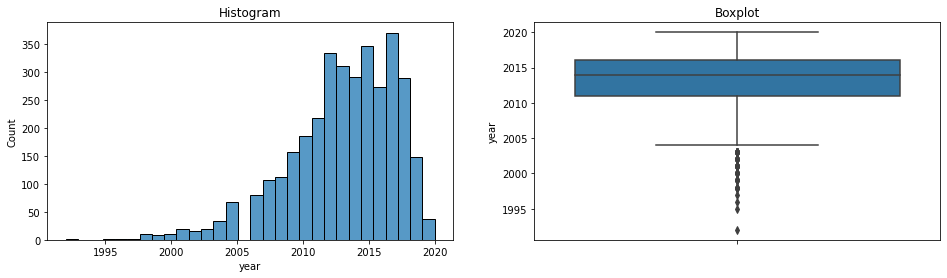


Skewness Value :  -0.8434078382132844


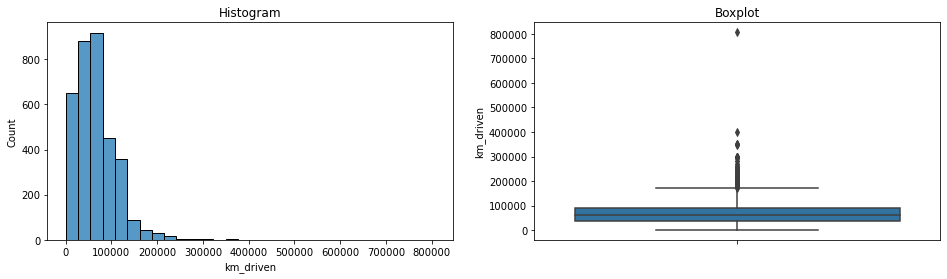


Skewness Value :  2.4833516075576663


In [28]:
# Mengecek apakah terdapat data outlier

diagnostic_plots(X_train, 'year')
print('\nSkewness Value : ', X_train['year'].skew())

diagnostic_plots(X_train, 'km_driven')
print('\nSkewness Value : ', X_train['km_driven'].skew())

Berdasarkan grafik di atas, diketahui terdapat data outlier. Tetapi, data-data outlier tersebut tidak akan ditangani, karena data-data tersebut merupakan data alamiah/aktual, bukan data yang menjadi outlier karena adanya kesalahan input data.

## Missing Value

In [29]:
X_train.isnull().sum()

name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
dtype: int64

In [30]:
X_test.isnull().sum()

name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
dtype: int64

In [31]:
y_train.isnull().sum()

0

In [32]:
y_test.isnull().sum()

0

Terlihat jika tidak ada data yang memiliki missing value pada data train dan testnya

## Feature Selection

In [33]:
# Menampilkan data X_train

X_train

,name,year,km_driven,fuel,seller_type,transmission,owner
2396,Maruti Ritz VXi,2010,42000,Petrol,Individual,Manual,First Owner
1622,Ford Fusion 1.6 Duratec Petrol,2005,100000,Petrol,Individual,Manual,Third Owner
4130,Honda Amaze S i-Dtech,2014,69000,Diesel,Dealer,Manual,First Owner
466,Maruti Vitara Brezza ZDi Plus,2018,20000,Diesel,Individual,Manual,First Owner
3155,Hyundai i10 Magna,2008,56000,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
321,Mitsubishi Outlander 2.4,2012,140000,Petrol,Individual,Automatic,First Owner
4066,Mahindra Scorpio 2.6 Turbo 7 Str,2008,120000,Diesel,Individual,Manual,Second Owner
3980,Hyundai Creta 1.6 VTVT S,2015,25000,Petrol,Individual,Manual,First Owner
931,Honda City VX MT,2010,48781,Petrol,Dealer,Manual,First Owner


Berdasarkan heatmap di bagian EDA, variable yang memiliki korelasi tinggi dengan 'selling_price' adalah 'year' dan 'km_driven' merupakan kolom yang memiliki nilay korelasi yang rendah. jadi saya akan drop kolom tersebut 

In [34]:
X_train.drop(['km_driven'], axis=1, inplace=True)
X_test.drop(['km_driven'], axis=1, inplace=True)

In [35]:
X_train

,name,year,fuel,seller_type,transmission,owner
2396,Maruti Ritz VXi,2010,Petrol,Individual,Manual,First Owner
1622,Ford Fusion 1.6 Duratec Petrol,2005,Petrol,Individual,Manual,Third Owner
4130,Honda Amaze S i-Dtech,2014,Diesel,Dealer,Manual,First Owner
466,Maruti Vitara Brezza ZDi Plus,2018,Diesel,Individual,Manual,First Owner
3155,Hyundai i10 Magna,2008,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...
321,Mitsubishi Outlander 2.4,2012,Petrol,Individual,Automatic,First Owner
4066,Mahindra Scorpio 2.6 Turbo 7 Str,2008,Diesel,Individual,Manual,Second Owner
3980,Hyundai Creta 1.6 VTVT S,2015,Petrol,Individual,Manual,First Owner
931,Honda City VX MT,2010,Petrol,Dealer,Manual,First Owner


## Feature Scaling

In [36]:
# split columns
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

print('Numerical Columns :',num_cols)
print('\nCategorical Columns :',cat_cols)

Numerical Columns : ['year']

Categorical Columns : ['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [37]:
# Feature Scaling
scaler = StandardScaler()

In [38]:
# Feature Encoding
ohe = OneHotEncoder(handle_unknown='ignore')

In [39]:
# Make Pipeline for preprocessing

num_pipe = Pipeline([
    ('scaler', scaler)
    ])

cat_pipe = Pipeline(
    [('encoder', ohe)]
)

preprocessing = ColumnTransformer(
    [('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)]
)

# Model Definition

## Logistic Regression

In [40]:
model_LR = LogisticRegression()
pipe_lr = Pipeline([('preprocessing', preprocessing), ('lr', model_LR)])

## KNN

In [41]:
model_KNN = KNeighborsClassifier()
pipe_knn = Pipeline([('preprocessing', preprocessing), ('knn', model_KNN)])

## SVM

In [42]:
model_SVM = SVC()
pipe_svm = Pipeline([('preprocessing', preprocessing), ('svm', model_SVM)])

## Random Forest

In [43]:
model_rf = RandomForestRegressor()
pipe_rf = Pipeline([('preprocessing', preprocessing),('regression', model_rf)])

## AdaBoost

In [44]:
model_ada = AdaBoostRegressor()
pipe_ada = Pipeline([('preprocessing', preprocessing),('adaboost', model_ada)])

## XGBoost

In [45]:
model_xgb = XGBRegressor()
pipe_xgb = Pipeline([('preprocessing', preprocessing),('xgboost', model_xgb)])

# Model Training

## Logistic Regression

In [46]:
# Melakukan model training Logistic Regression dengan pipeline

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('lr', LogisticRegression())])

## KNN

In [47]:
# Melakukan model training KNN dengan pipeline

pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('knn', KNeighborsClassifier())])

## SVM

In [48]:
# Melakukan model training SVM dengan pipeline

pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('svm', SVC())])

## Random Forest

In [49]:
# Melakukan model training Random Forest dengan pipeline

pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('regression', RandomForestRegressor())])

## AdaBoost

In [50]:
# Melakukan model training AdaBoost dengan pipeline

pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('adaboost', AdaBoostRegressor())])

## XGBoost

In [51]:
# Melakukan model training XGBoost dengan pipeline

pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('xgboost',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

# Model Evaluation

## Logistic Regression

In [52]:
y_pred_lr_train = pipe_lr.predict(X_train)
y_pred_lr_test = pipe_lr.predict(X_test)

# Train
mae_model1_train = mean_absolute_error(y_train, y_pred_lr_train)
mse_model1_train = mean_squared_error(y_train, y_pred_lr_train)
rmse_model1_train = mean_squared_error(y_train, y_pred_lr_train, squared=False)
r2_model1_train = r2_score(y_train, y_pred_lr_train)
print("======== Error Train-set ========")
print('Mean Absolute Error :', mae_model1_train)
print('Mean Squared Error :', mse_model1_train)
print('R Mean Squared Error :', rmse_model1_train)
print('R2 Score :', r2_model1_train)

print(' ')

# Test
mae_model1_test = mean_absolute_error(y_test, y_pred_lr_test)
mse_model1_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_model1_test = mean_squared_error(y_test, y_pred_lr_test, squared=False)
r2_model1_test = r2_score(y_test, y_pred_lr_test)
print("======== Error Test-set ========")
print('Mean Absolute Error :', mae_model1_test)
print('Mean Squared Error :', mse_model1_test)
print('R Mean Squared Error :', rmse_model1_test)
print('R2 Score :', r2_model1_test)

======== Error Train-set ========
Mean Absolute Error : 113199.10416666667
Mean Squared Error : 112384157546.09723
R Mean Squared Error : 335237.46441305935
R2 Score : 0.6503481199689327
 
======== Error Test-set ========
Mean Absolute Error : 148518.74305555556
Mean Squared Error : 101401523115.78703
R Mean Squared Error : 318436.0581275102
R2 Score : 0.7417953717802083


In [53]:
# Menampikan data cross validation

mean_LR = cross_val_score(pipe_lr, X_train, y_train, cv=5).mean()
std_LR = cross_val_score(pipe_lr, X_train, y_train, cv=5).std()
print(mean_LR)
print(std_LR)

0.15306709719515152
0.001915256782378772


## KNN

In [54]:
y_pred_knn_train = pipe_knn.predict(X_train)
y_pred_knn_test = pipe_knn.predict(X_test)

# Train
mae_model1_train = mean_absolute_error(y_train, y_pred_knn_train)
mse_model1_train = mean_squared_error(y_train, y_pred_knn_train)
rmse_model1_train = mean_squared_error(y_train, y_pred_knn_train, squared=False)
r2_model1_train = r2_score(y_train, y_pred_knn_train)
print("======== Error Train-set ========")
print('Mean Absolute Error :', mae_model1_train)
print('Mean Squared Error :', mse_model1_train)
print('R Mean Squared Error :', rmse_model1_train)
print('R2 Score :', r2_model1_train)

print(' ')

# Test
mae_model1_test = mean_absolute_error(y_test, y_pred_knn_test)
mse_model1_test = mean_squared_error(y_test, y_pred_knn_test)
rmse_model1_test = mean_squared_error(y_test, y_pred_knn_test, squared=False)
r2_model1_test = r2_score(y_test, y_pred_knn_test)
print("======== Error Test-set ========")
print('Mean Absolute Error :', mae_model1_test)
print('Mean Squared Error :', mse_model1_test)
print('R Mean Squared Error :', rmse_model1_test)
print('R2 Score :', r2_model1_test)

======== Error Train-set ========
Mean Absolute Error : 142466.69907407407
Mean Squared Error : 147158106439.4942
R Mean Squared Error : 383611.92165976047
R2 Score : 0.5421587018857543
 
======== Error Test-set ========
Mean Absolute Error : 179887.84027777778
Mean Squared Error : 122979566266.27083
R Mean Squared Error : 350684.425468641
R2 Score : 0.6868499386330225


In [55]:
# Menampikan data cross validation

mean_KNN = cross_val_score(pipe_knn, X_train, y_train, cv=5).mean()
std_KNN = cross_val_score(pipe_knn, X_train, y_train, cv=5).std()
print(mean_KNN)
print(std_KNN)

0.11226838878060615
0.006508118632683974


## SVM

In [56]:
y_pred_svm_train = pipe_svm.predict(X_train)
y_pred_svm_test = pipe_svm.predict(X_test)

# Train
mae_model1_train = mean_absolute_error(y_train, y_pred_svm_train)
mse_model1_train = mean_squared_error(y_train, y_pred_svm_train)
rmse_model1_train = mean_squared_error(y_train, y_pred_svm_train, squared=False)
r2_model1_train = r2_score(y_train, y_pred_svm_train)
print("======== Error Train-set ========")
print('Mean Absolute Error :', mae_model1_train)
print('Mean Squared Error :', mse_model1_train)
print('R Mean Squared Error :', rmse_model1_train)
print('R2 Score :', r2_model1_train)

print(' ')

# Test
mae_model1_test = mean_absolute_error(y_test, y_pred_svm_test)
mse_model1_test = mean_squared_error(y_test, y_pred_svm_test)
rmse_model1_test = mean_squared_error(y_test, y_pred_svm_test, squared=False)
r2_model1_test = r2_score(y_test, y_pred_svm_test)
print("======== Error Test-set ========")
print('Mean Absolute Error :', mae_model1_test)
print('Mean Squared Error :', mse_model1_test)
print('R Mean Squared Error :', rmse_model1_test)
print('R2 Score :', r2_model1_test)

======== Error Train-set ========
Mean Absolute Error : 166531.28125
Mean Squared Error : 182618601031.0515
R Mean Squared Error : 427338.97672813735
R2 Score : 0.43183328884269434
 
======== Error Test-set ========
Mean Absolute Error : 166766.42824074073
Mean Squared Error : 127069156460.6875
R Mean Squared Error : 356467.6092728307
R2 Score : 0.6764363759638019


In [57]:
# Menampikan data cross validation

mean_SVM = cross_val_score(pipe_svm, X_train, y_train, cv=5).mean()
std_SVM = cross_val_score(pipe_svm, X_train, y_train, cv=5).std()
print(mean_SVM)
print(std_SVM)

0.11052884736036406
0.006571506191062419


## Random Forest

In [58]:
y_pred_rf_train = pipe_rf.predict(X_train)
y_pred_rf_test = pipe_rf.predict(X_test)

# Train
mae_model1_train = mean_absolute_error(y_train, y_pred_rf_train)
mse_model1_train = mean_squared_error(y_train, y_pred_rf_train)
rmse_model1_train = mean_squared_error(y_train, y_pred_rf_train, squared=False)
r2_model1_train = r2_score(y_train, y_pred_rf_train)
print("======== Error Train-set ========")
print('Mean Absolute Error :', mae_model1_train)
print('Mean Squared Error :', mse_model1_train)
print('R Mean Squared Error :', rmse_model1_train)
print('R2 Score :', r2_model1_train)

print(' ')

# Test
mae_model1_test = mean_absolute_error(y_test, y_pred_rf_test)
mse_model1_test = mean_squared_error(y_test, y_pred_rf_test)
rmse_model1_test = mean_squared_error(y_test, y_pred_rf_test, squared=False)
r2_model1_test = r2_score(y_test, y_pred_rf_test)
print("======== Error Test-set ========")
print('Mean Absolute Error :', mae_model1_test)
print('Mean Squared Error :', mse_model1_test)
print('R Mean Squared Error :', rmse_model1_test)
print('R2 Score :', r2_model1_test)

======== Error Train-set ========
Mean Absolute Error : 47186.12188457447
Mean Squared Error : 14412476471.072222
R Mean Squared Error : 120051.9740407138
R2 Score : 0.9551596096456308
 
======== Error Test-set ========
Mean Absolute Error : 111634.66895131113
Mean Squared Error : 55901603388.655975
R Mean Squared Error : 236435.1991321427
R2 Score : 0.8576544781938197


In [59]:
# Menampikan data cross validation

mean_RF = cross_val_score(pipe_rf, X_train, y_train, cv=5).mean()
std_RF = cross_val_score(pipe_rf, X_train, y_train, cv=5).std()
print(mean_RF)
print(std_RF)

0.7108824500289506
0.08120914425605767


## AdaBoost

In [60]:
y_pred_ada_train = pipe_ada.predict(X_train)
y_pred_ada_test = pipe_ada.predict(X_test)

# Train
mae_model1_train = mean_absolute_error(y_train, y_pred_ada_train)
mse_model1_train = mean_squared_error(y_train, y_pred_ada_train)
rmse_model1_train = mean_squared_error(y_train, y_pred_ada_train, squared=False)
r2_model1_train = r2_score(y_train, y_pred_ada_train)
print("======== Error Train-set ========")
print('Mean Absolute Error :', mae_model1_train)
print('Mean Squared Error :', mse_model1_train)
print('R Mean Squared Error :', rmse_model1_train)
print('R2 Score :', r2_model1_train)

print(' ')

# Test
mae_model1_test = mean_absolute_error(y_test, y_pred_ada_test)
mse_model1_test = mean_squared_error(y_test, y_pred_ada_test)
rmse_model1_test = mean_squared_error(y_test, y_pred_ada_test, squared=False)
r2_model1_test = r2_score(y_test, y_pred_ada_test)
print("======== Error Test-set ========")
print('Mean Absolute Error :', mae_model1_test)
print('Mean Squared Error :', mse_model1_test)
print('R Mean Squared Error :', rmse_model1_test)
print('R2 Score :', r2_model1_test)

======== Error Train-set ========
Mean Absolute Error : 229084.48204048927
Mean Squared Error : 153318006228.60242
R Mean Squared Error : 391558.43271292525
R2 Score : 0.5229938961952261
 
======== Error Test-set ========
Mean Absolute Error : 249637.25564465008
Mean Squared Error : 195326373374.32205
R Mean Squared Error : 441957.4338941727
R2 Score : 0.5026290328889051


In [61]:
# Menampikan data cross validation

mean_ADA = cross_val_score(pipe_ada, X_train, y_train, cv=5).mean()
std_ADA = cross_val_score(pipe_ada, X_train, y_train, cv=5).std()
print(mean_ADA)
print(std_ADA)

0.43781790257311465
0.06714322385031406


## XGBoost

In [62]:
y_pred_xgb_train = pipe_xgb.predict(X_train)
y_pred_xgb_test = pipe_xgb.predict(X_test)

# Train
mae_model1_train = mean_absolute_error(y_train, y_pred_xgb_train)
mse_model1_train = mean_squared_error(y_train, y_pred_xgb_train)
rmse_model1_train = mean_squared_error(y_train, y_pred_xgb_train, squared=False)
r2_model1_train = r2_score(y_train, y_pred_xgb_train)
print("======== Error Train-set ========")
print('Mean Absolute Error :', mae_model1_train)
print('Mean Squared Error :', mse_model1_train)
print('R Mean Squared Error :', rmse_model1_train)
print('R2 Score :', r2_model1_train)

print(' ')

# Test
mae_model1_test = mean_absolute_error(y_test, y_pred_xgb_test)
mse_model1_test = mean_squared_error(y_test, y_pred_xgb_test)
rmse_model1_test = mean_squared_error(y_test, y_pred_xgb_test, squared=False)
r2_model1_test = r2_score(y_test, y_pred_xgb_test)
print("======== Error Test-set ========")
print('Mean Absolute Error :', mae_model1_test)
print('Mean Squared Error :', mse_model1_test)
print('R Mean Squared Error :', rmse_model1_test)
print('R2 Score :', r2_model1_test)

======== Error Train-set ========
Mean Absolute Error : 112145.78535065828
Mean Squared Error : 23092634742.870975
R Mean Squared Error : 151962.60968695878
R2 Score : 0.9281537244303881
 
======== Error Test-set ========
Mean Absolute Error : 143768.13184497974
Mean Squared Error : 65318519217.65871
R Mean Squared Error : 255574.87986431434
R2 Score : 0.8336756347219294


In [63]:
# Menampikan data cross validation

mean_XGB = cross_val_score(pipe_xgb, X_train, y_train, cv=5).mean()
std_XGB = cross_val_score(pipe_xgb, X_train, y_train, cv=5).std()
print(mean_XGB)
print(std_XGB)

0.7238542031866606
0.07450648561219525


Dari pemodelan ini terlihat jika Random Forest dan XGBoost memiliki nilai R2Score yang bagus tetapi pada MEAnya Random Forest memiliki selesi 65473 antara train dan testnya sedangkan pada XGBoost memiliki selesi 31623 antara data train dan tesnya

## Cross-Validation

In [64]:
# Membuat tabel cross validation

cv = {'model': ['Logistic Regression','KNN', 'SVM', 'Random Forest', 'AdaBoost', 'XGBoost'],
      'mean': [mean_LR, mean_KNN, mean_SVM, mean_RF, mean_ADA, mean_XGB],
      'standard deviation': [std_LR, std_KNN, std_SVM, std_RF, std_ADA, std_XGB]}

data_cv = pd.DataFrame(cv)
data_cv.sort_values('mean', ascending=False)

,model,mean,standard deviation
5,XGBoost,0.723854,0.074506
3,Random Forest,0.710882,0.081209
4,AdaBoost,0.437818,0.067143
0,Logistic Regression,0.153067,0.001915
1,KNN,0.112268,0.006508
2,SVM,0.110529,0.006572


Pada tabel cross validation, semakin tinggi nilai mean dan semakin rendah nilai standard deviation, maka semakin bagus. Maka dari keenam model yang digunakan, dapat disimpulkan model terbaik adalah XGBoost dengan nilai mean 0.723854. Maka dari itu model yang akan dilakukan hyperparameter tuning dengan GridSearchCV adalah XGBoost.

## Hyperparameter Tuning

In [65]:
# Parameter Tuning
parameter = {
    'algo__max_depth': [1,3,6,10,12],
    'algo__learning_rate': [0.01, 0.05, 0.1, 0, 5, 10],
    'algo__n_estimators': [100, 500, 1000],
    'algo__colsample_bytree': [0.3, 0.7, 0.9]}

In [66]:
# Pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("algo", XGBRegressor(random_state=42))
])

In [67]:
model = GridSearchCV(pipeline, parameter, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['name',
                                                                          'fuel',
                                                                          'seller_type',
                                                                          'transmission',
                                                                          'owner'])])),
                                       ('algo',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=N...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'algo__colsample_bytree': [0.3, 0.7, 0.9],
                         'algo__learning_rate': [0.01, 0.05, 0.1, 0, 5, 10],
                         'algo__max_depth': [1, 3, 6, 10, 12],
                         'algo__n_estimators': [100, 500, 1000]},
             verbose=1)

In [68]:
# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

{'algo__colsample_bytree': 0.3, 'algo__learning_rate': 0.1, 'algo__max_depth': 12, 'algo__n_estimators': 1000}
0.9854851020081195 0.8775976412644018


In [69]:
print(cross_val_score(model.best_estimator_,X_train,y_train).mean())

0.7625424587369128


In [70]:
print(cross_val_score(model.best_estimator_,X_train,y_train).std())

0.08383796357058422


In [71]:
# Predict Train-set dan Test-set
Grid_XG_y_pred_train= model.best_estimator_.predict(X_train)
Grid_XG_y_pred_test= model.best_estimator_.predict(X_test)

In [72]:
# Membandingkan akurasi dari train-set dan test-set sebelum dan setelah hyperparameter tuning

print('Sebelum hyperparameter tuning')
print('Mean Absolute Error :', mae_model1_train)
print('Mean Absolute Error :', mae_model1_test)
print('R2 Score :', r2_model1_train)
print('R2 Score :', r2_model1_test)
print('\nSetelah hyperparameter tuning')
print('Mean Absolute Error : ', mean_absolute_error(y_train, Grid_XG_y_pred_train))
print('Mean Absolute Error : ', mean_absolute_error(y_test, Grid_XG_y_pred_test))
print('R2 Score = ', r2_score(y_train, Grid_XG_y_pred_train))
print('R2 Score = ', r2_score(y_test, Grid_XG_y_pred_test))

Sebelum hyperparameter tuning
Mean Absolute Error : 112145.78535065828
Mean Absolute Error : 143768.13184497974
R2 Score : 0.9281537244303881
R2 Score : 0.8336756347219294

Setelah hyperparameter tuning
Mean Absolute Error :  52775.02755511249
Mean Absolute Error :  108597.49718786169
R2 Score =  0.9854851020081195
R2 Score =  0.8775976412644018


Terlihat setelah dilakukannya tuning dengan menggunakan GridSearchCV pada pemodelan XGBoost dengan best parameternya{'algo__colsample_bytree': 0.3, 'algo__learning_rate': 0.1, 'algo__max_depth': 12, 'algo__n_estimators': 1000}  mendapatkan skor MAE yang mengalami penurunan dan pada skor R2Score mengalami peningkatan. Selanjutnya model akan digunakan pada model inferens

# Model Saving

In [73]:
# Save file untuk data inference

with open('model.pkl', 'wb') as file_1:
  joblib.dump(model, file_1)

# Model Inference

In [74]:
# Mengakses file yang telah di-save untuk data inference

with open('model.pkl', 'rb') as file_1:
  model = joblib.load(file_1)

In [75]:
# Menampilkan data inference-set

data_inf

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Hyundai Santro GS,2005,80000,56580,Petrol,Dealer,Manual,First Owner
1,Maruti Ertiga VDI,2019,925000,50000,Diesel,Individual,Manual,First Owner
2,Renault Duster 85PS Diesel RxL Optional,2013,600000,120000,Diesel,Individual,Manual,First Owner
3,Chevrolet Beat LT,2012,155000,12000,Petrol,Individual,Manual,First Owner
4,Tata Sumo Victa EX 7/9 Str BSII,2009,130000,120000,Diesel,Individual,Manual,First Owner
5,Hyundai Creta 1.6 CRDi SX,2016,535000,52600,Diesel,Individual,Manual,First Owner
6,Maruti Alto 800 LXI,2018,275000,35000,Petrol,Individual,Manual,First Owner
7,Toyota Etios Liva 1.4 VD,2017,425000,36000,Diesel,Dealer,Manual,First Owner
8,Ford EcoSport 1.5 TDCi Titanium BSIV,2018,950000,21394,Diesel,Dealer,Manual,First Owner
9,Maruti 800 Std,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner


In [79]:
# Predict menggunakan XGboost Hyperparameter Tuning

y_pred_inf = model.predict(data_inf)
y_pred_inf

array([  77525.82,  946642.06,  411383.03,  210507.88,  266534.72,
        686584.2 ,  271220.66,  485965.22,  938976.3 ,   54554.29,
       1000949.75,  145016.75,  287570.8 ,  391198.28,  641286.6 ,
        243381.2 ,  319293.5 ,  739719.3 ,  194505.56,  609893.44],
      dtype=float32)

In [81]:
# Membuat dataframe hasil prediksi SVM Hyperparameter Tuning

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns= ['Price Prediction'])
y_pred_inf_df

,Price Prediction
0,7.752582e+04
1,9.466421e+05
2,4.113830e+05
3,2.105079e+05
4,2.665347e+05
5,6.865842e+05
6,2.712207e+05
7,4.859652e+05
8,9.389763e+05
9,5.455429e+04


In [82]:
# Menggabungkan data inference-set dengan result prediction

df_akhir = pd.concat([data_inf, y_pred_inf_df], axis=1)
df_akhir

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Price Prediction
0,Hyundai Santro GS,2005,80000,56580,Petrol,Dealer,Manual,First Owner,7.752582e+04
1,Maruti Ertiga VDI,2019,925000,50000,Diesel,Individual,Manual,First Owner,9.466421e+05
2,Renault Duster 85PS Diesel RxL Optional,2013,600000,120000,Diesel,Individual,Manual,First Owner,4.113830e+05
3,Chevrolet Beat LT,2012,155000,12000,Petrol,Individual,Manual,First Owner,2.105079e+05
4,Tata Sumo Victa EX 7/9 Str BSII,2009,130000,120000,Diesel,Individual,Manual,First Owner,2.665347e+05
5,Hyundai Creta 1.6 CRDi SX,2016,535000,52600,Diesel,Individual,Manual,First Owner,6.865842e+05
6,Maruti Alto 800 LXI,2018,275000,35000,Petrol,Individual,Manual,First Owner,2.712207e+05
7,Toyota Etios Liva 1.4 VD,2017,425000,36000,Diesel,Dealer,Manual,First Owner,4.859652e+05
8,Ford EcoSport 1.5 TDCi Titanium BSIV,2018,950000,21394,Diesel,Dealer,Manual,First Owner,9.389763e+05
9,Maruti 800 Std,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner,5.455429e+04


# Pengambilan Kesimpulan

Dari dataset ini menunjukkan untuk mobil yang paling banyak dijual adalah mobil 'Maruti Swift Dzine VDI', untuk seller paling banyak di Individual dimana menjualnya dengan cara sendiri bukan dari Dealer sedangkan untuk harga jual mobil tertinggi berdasarkan seller adalah Trustmark Dealer itulah kenapa pada data seller_type Trustmark Dealer merupakan yang terendah karna untuk harga jualnya sendiri yang tertinggi atau mahal sedangkan Individual menjualnya lebih murah.

Dari hasil 6 pemodelan yang sudah dilakukan terlihat jika pemodelan XGBoost yang tebaik sehingga pemodelan XGBoost dipakai untuk melakukan prediksi harga jual mobil. 